In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a Dataframe

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('./database/csv_files/Csv_employee_retention.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# null values

df.isnull().sum().sum()

0

In [5]:
df.shape

(14999, 10)

<AxesSubplot:>

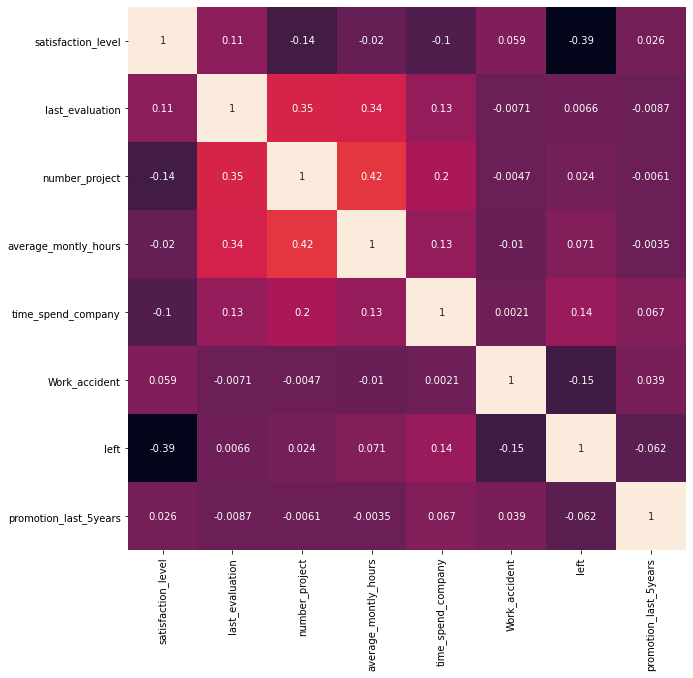

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cbar = False)

In [7]:
# 'last_evaluation' & 'number_project' are irrelevent

df2 = df.drop(['last_evaluation','number_project'], axis = 1)
df2.shape

(14999, 8)

### Dropout percent in various department

In [8]:
pie_df = df2[df2.loc[:,'left'] == 1]['Department']

In [9]:
pie_df = pd.DataFrame(pie_df.value_counts())
pie_df

,Department
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121
management,91


In [10]:
pie_df.reset_index(inplace=True)

In [11]:
pie_df

,index,Department
0,sales,1014
1,technical,697
2,support,555
3,IT,273
4,hr,215
5,accounting,204
6,marketing,203
7,product_mng,198
8,RandD,121
9,management,91


In [12]:
pie_df.rename(columns={'index' : 'Department','Department' : 'Employees_Left'}, inplace=True)


In [13]:
pie_df

,Department,Employees_Left
0,sales,1014
1,technical,697
2,support,555
3,IT,273
4,hr,215
5,accounting,204
6,marketing,203
7,product_mng,198
8,RandD,121
9,management,91


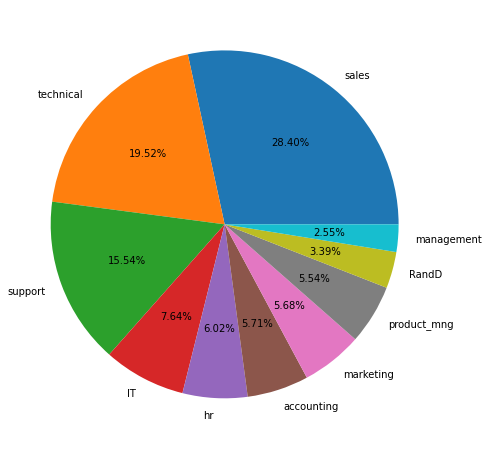

In [20]:
plt.figure(figsize=(8,8))

plt.pie(pie_df.Employees_Left, labels=pie_df.Department, autopct='%0.2f%%')
plt.show()

## Dropout percent in various salary range

In [31]:
pie_df = pd.DataFrame(df2[df2.loc[:,'left'] == 1]['salary'].value_counts()).reset_index().rename(columns = {'index' : 'salary',
                                                                                         'salary' : 'left_numbers'})
pie_df

,salary,left_numbers
0,low,2172
1,medium,1317
2,high,82


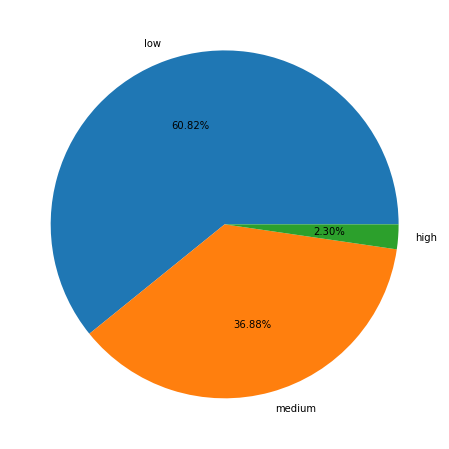

In [32]:
plt.figure(figsize=(8,8))

plt.pie(pie_df.left_numbers, labels=pie_df.salary, autopct='%0.2f%%')
plt.show()

## catagrorical encoding

In [34]:
df2.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low


In [53]:
df3 = pd.get_dummies(df2, drop_first=True)
df3.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Feature Scaling

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

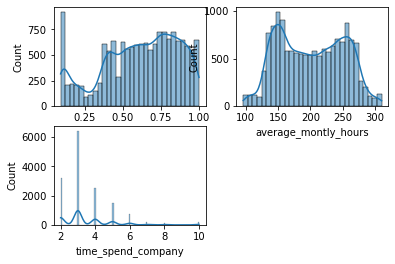

In [57]:

plt.subplot(2,2,1)
sns.histplot(df['satisfaction_level'], kde=True)

plt.subplot(2,2,2)
sns.histplot(df['average_montly_hours'], kde=True)

plt.subplot(2,2,3)
sns.histplot(df['time_spend_company'], kde=True)

In [65]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
df3.update(pd.DataFrame(normalizer.fit_transform(df3[['satisfaction_level','average_montly_hours','time_spend_company']])
             , columns=['satisfaction_level','average_montly_hours','time_spend_company']))

In [69]:
df3.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.318681,0.285047,0.125,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.780220,0.775701,0.500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.021978,0.822430,0.250,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.692308,0.593458,0.375,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.307692,0.294393,0.125,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## spliting dataset into training and testing dataset

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df3.drop('left',axis = 1),df3.left, train_size=0.8)

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [87]:
logistic.score(x_test,y_test)

0.769